 
    
**Название проекта**
Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста
_____
**Описание исследования.**
Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 
_____
**Цель исследования.**
    
Исходя из анализа А/В теста принять решение остановливать его или продолжать. 
    
_____
**Задачи исследования.** \
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Исходные данные.**
    
Данные для первой части: /datasets/hypothesis.csv

Hypothesis — краткое описание гипотезы;\
Reach — охват пользователей по 10-балльной шкале;\
Impact — влияние на пользователей по 10-балльной шкале;\
Confidence — уверенность в гипотезе по 10-балльной шкале;\
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
Данные для второй части

Файл /datasets/orders.csv\
transactionId — идентификатор заказа;\
visitorId — идентификатор пользователя, совершившего заказ;\
date — дата, когда был совершён заказ;\
revenue — выручка заказа;\
group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv\
date — дата;\
group — группа A/B-теста;\
visitors — количество пользователей в указанную дату в указанной группе A/B-теста\



## 1 Открываем файл, изучаем общую информацию

In [1]:
# импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore') 
pd.set_option('display.max_colwidth', None)


In [2]:
#чтение файлов и сохранение их в переменные

try:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

### 1. 1 Смотрим общую информацию по файлам

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
#общая информация о файле с заказами
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
#общая информация о файле с пользователями
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### 1.2 Проверка на дубликаты

In [9]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Молодец, что делаешь проверку на дубликаты.
</div>

Вывод: Файлы сохранены в соответствующие переменные. Требуется привести дату к формату дата, и привести названия столбцов к нижнему регистру, переименовать назваия столбцов. Пропусков и дубликатов не обнаружено

## 2 Выполняем предобработку

### 2.1 Привожу столбцы к нижнему регистру

In [9]:
hypothesis.columns = hypothesis.columns.str.lower()


### 2.2 Привожу дату к нужному формату

In [10]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])


### 2.3 Пользователи попавшие в обе группы

In [13]:
#почитаем процент таких пользователей от общего числа пользователей
a_b_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

total_users = len(orders['visitorId'].unique())

print('Пользовтели попавшие в обе группы', a_b_users[0]/total_users*100, '%')



Пользовтели попавшие в обе группы 5.625606207565471 %


In [16]:
# удалим пользователй попаших в обе группы
# делим пользователей из orders
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
  
# получаем пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))

In [20]:
#оставим только тех пользователей, кто не попал в обе группы
orders = orders.query('visitorId not in @group_intersections')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Вывод: Столбцы приведены к нижнему регистру, дата приведена к формату дата, пользователи попавшие в обе группы удалены, из было 5,6% 

## 3 Приоритизация гипотез

### 3.1 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [22]:
# создам новый столбец ICE и отсортирую 
hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### 3.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [23]:
# создам новый столбец RICE и отсортирую 
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод: После расчета ICE самые популярные гипотезы 8, 0, 7 и 6 после расчета RICE на первое место попадает гипотеза 7 т.к. уровень охвата у нее самый большой. 
На втором месте 2, 3м - 0, 6 на 4м

Самые важные гипотезы\
7 -  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок\
0 -  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей\
6 -  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   

Далее будет тестироваться приоритетная гипотеза - 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

## 4. Анализ A/B-теста

### График кумулятивной выручки по группам.

In [26]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#построчно посчитаем сумму заказов, количество посетителей и количество транзакий
ordersAggregated = datesGroups.apply\
    (lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'})\
     , axis=1).sort_values(by=['date','group'])

ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [28]:
#считаем данные по пользователям
visitorsAggregated = datesGroups.apply\
    (lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
     .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [29]:
# объединяем даные 2х таблиц
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


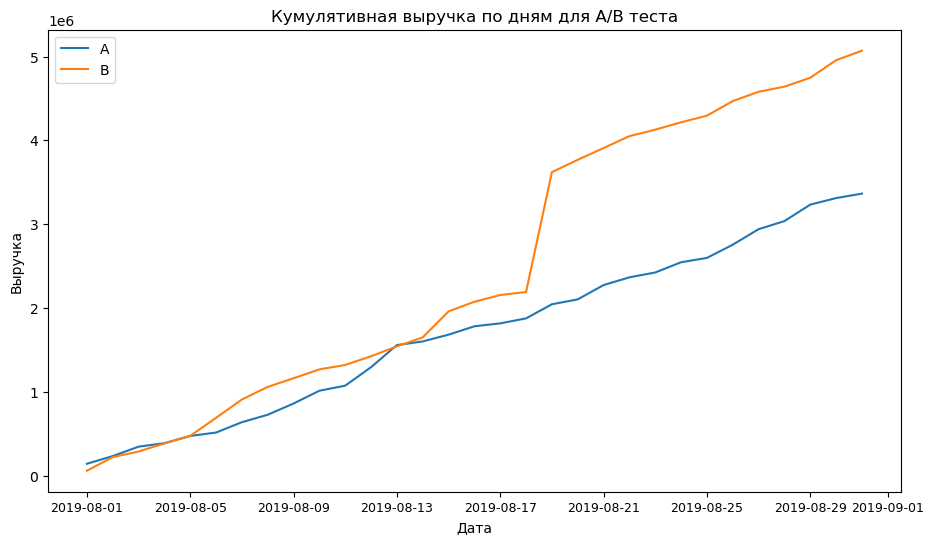

In [30]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(11, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(fontsize=9)
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по дням для А/В теста')
plt.legend()
plt.show()

Вывод: Графики за рассматриваемый период растут равномерно, однако для группы В резкое увеличение выручки с 17-08. Это может говорить о резком увеличении числа заказов или об увеличении их стоимоти 

### График кумулятивного среднего чека по группам.

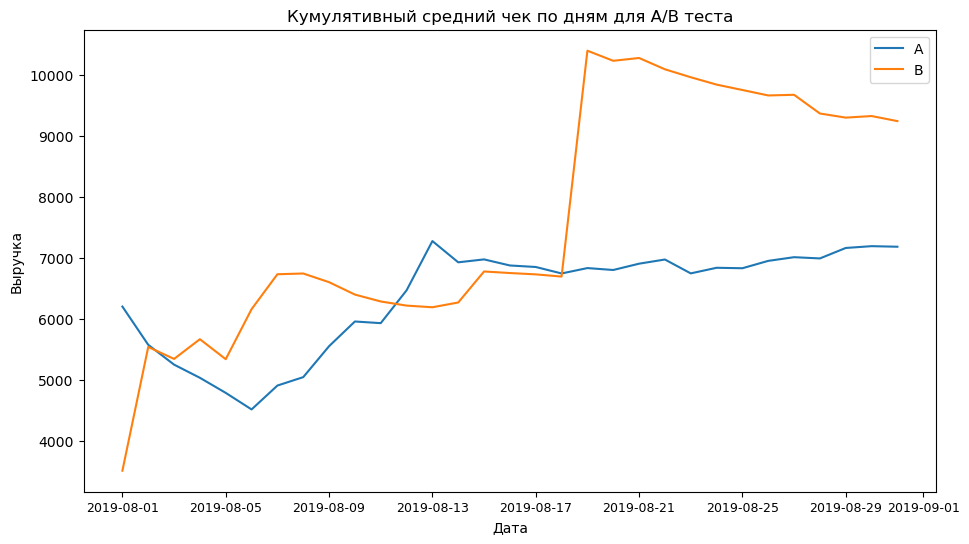

In [31]:
plt.figure(figsize=(11, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек по дням для А/В теста')
plt.xticks(fontsize=9)
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.show()

Вывод: В начале тест чек в группе А резко упал, затем, с 5 по 13 наблюдается рост, после 13 стабилизация. Средний чек В практически время время больше чем в группе А,  17-08 резкое, почти вертикальное увеличение среднего чека для группы В, увеличивается в то же время что и выручка, затем стабилизация. Предположительно в группе В была 1 или несколько крупных покупок.

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

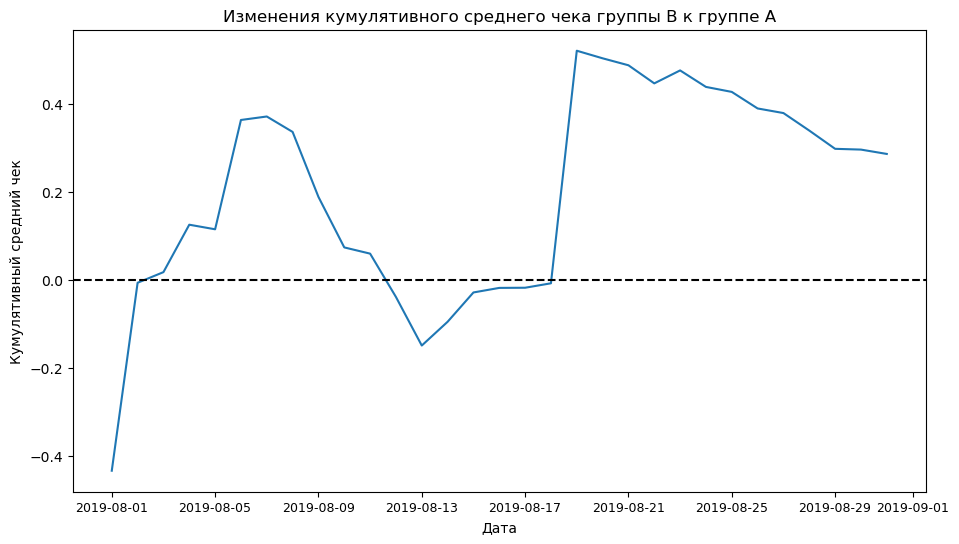

In [32]:

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(11, 6))
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(fontsize=9)
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.show()

Вывод: результаты теста зачитально менялись 09 - резкое падение и 17 резкий рост. Предположительно были совершены аномально больше заказы

### График кумулятивного среднего количества заказов на посетителя по группам. 

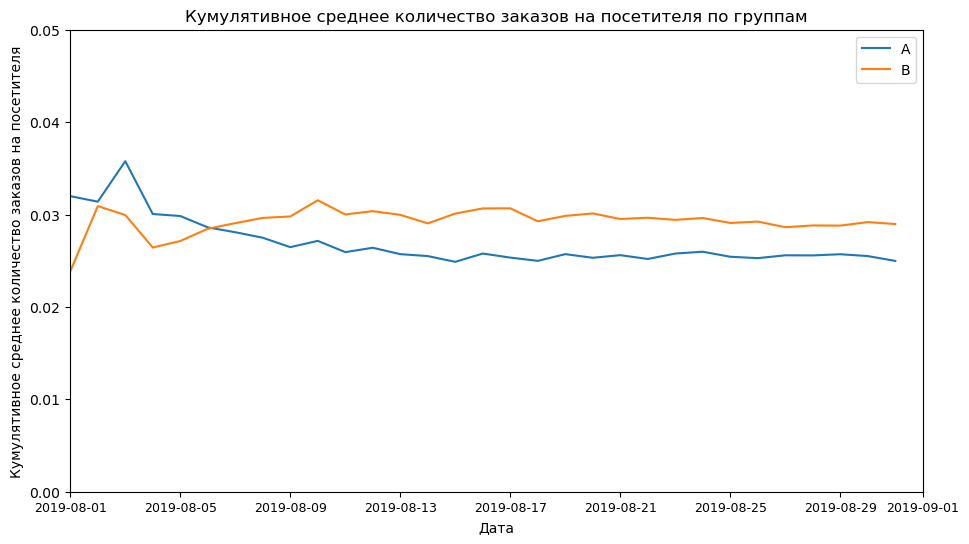

In [33]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(11, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(fontsize=9)
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9,1), 0, 0.05])
plt.legend()
plt.show()



Вывод: В начале теста средее количество заказов обеих групп показало небольшой рост и сразу небольшое падение. После 06-08 среднее количество заказов группы В начало расти и к 10 стабилизировалось. Среднее количество заказов группы А после 06-08 показало падение и после 09-08 было стабильно ниже группы В

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

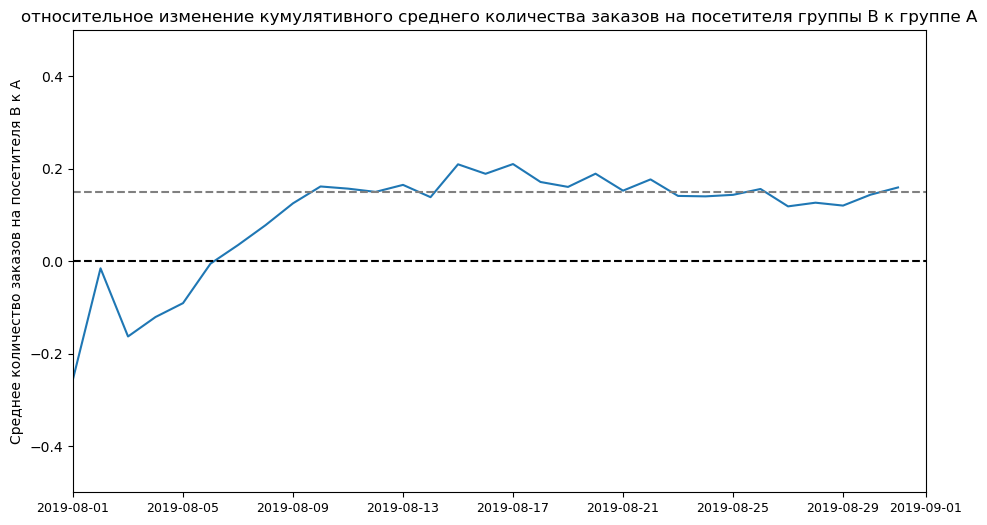

In [35]:
#соединим таблицы кумулятисной конверсии оставив дату и конверсию
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(11, 6))
#поделим конверсию группа Б на А, построим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1)
plt.title('относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9,1), -0.5, 0.5])
plt.xticks(fontsize=9)
plt.ylabel('Среднее количество заказов на посетителя В к А')
plt.show()

Вывод: В начале исследования группа А показывала лучшие результаты, однако после 06-08 группа В была стабильно с более высоким средним чеком

### Tочечный график количества заказов по пользователям.

In [47]:
#сгруппируем заказы по пользователям и посчитаем количество транзакций на каждого
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})    
)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


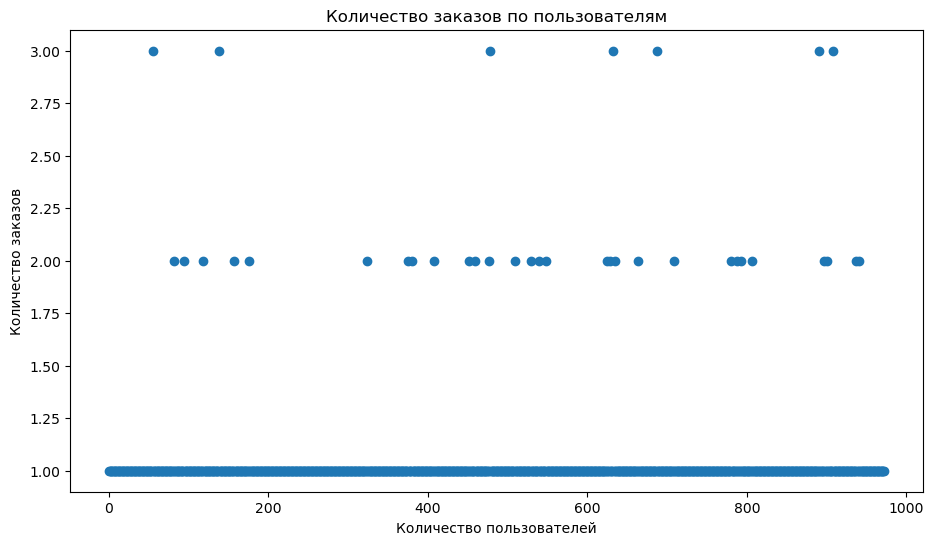

In [48]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

#построим точечные график с количеством заказов по пользователям
plt.figure(figsize=(11, 6))
plt.scatter(x_values, ordersByUsers['orders'] )
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Вывод: По графику что большинство пользователей делают 1 или 2 заказа. Есть несколько пользователей, которые совершили более 5 заказов, проедположително их можно считать аномальными

### 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99]) )

[2. 4.]


Вывод: Не более 5% пользователей совершали 2 покупки и не более 1% 4 покупки. Выберем 2 заказа на пользователя как нижнюю границу, все что больше 2 будем считать аномалиями

### Точечный график стоимостей заказов

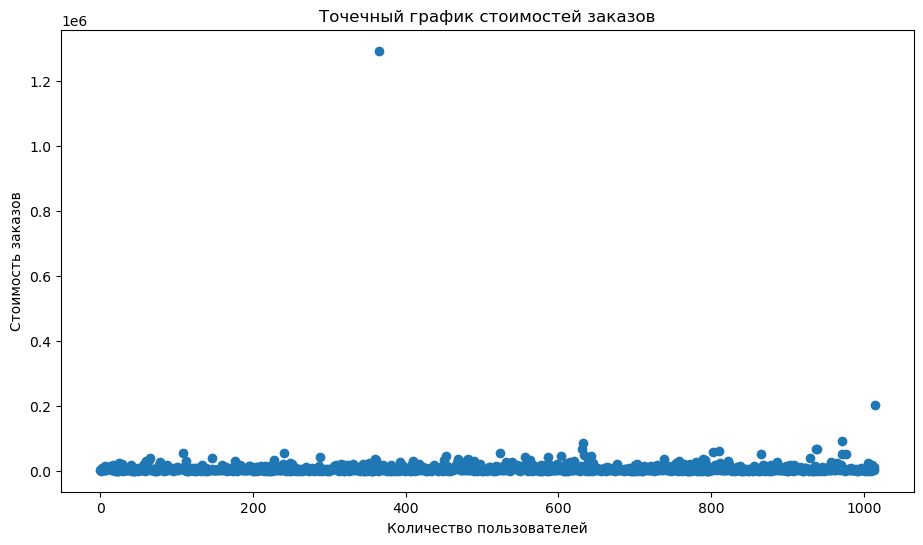

In [49]:
# серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(11, 6))
#построим график где каждому заказу будет соответствовать точка
plt.scatter(x_values, orders['revenue']) 

plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

plt.title('Точечный график стоимостей заказов')
plt.show()

На этом этапе видно 2 аномалии, остальные заказы сливаются, попробуем изменить масштаб

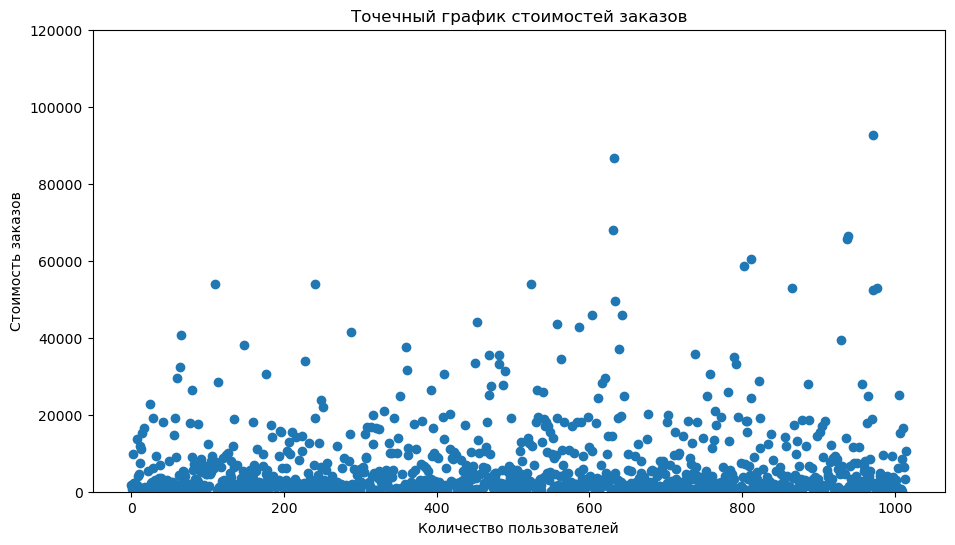

In [53]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(11, 6))

plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.ylim(0, 120000)
plt.show()

Сумма основныех заказов не превышает 20000, посмотрим на перцентили 

### 95-й и 99-й перцентили стоимости заказов

In [28]:
print(np.percentile(orders['revenue'], [95, 99]) )

[28000.  58233.2]


Вывод: не более 5% заказов превышает 28000 и не более 1% превышает 58233. Возьмем 28000 за отсечку и будем считать заказы с большей стоимостью аномалиями

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы. Нулевая: Статистически значимых различий в среднем количестве заказов между группами нет. Альтернативная: Статистически значимые различия в среднем между группами есть.
alpha = 0.05
Рассчитаем статистическую значимость различия в среднем количестве заказов по результатам теста Манна-Уитни


In [55]:
#выделим пользователей из группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#посчитаем пользотелей с накоплением по дате
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#выделим пользователей из группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#посчитаем пользотелей с накоплением по дате
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#выделим дату, id заказа и выручку для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#посчитаем заказы и выручку с накоплением
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#выделим дату, id заказа и выручку для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#посчитаем заказы и выручку с накоплением
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#соединим таблицы 
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              19           142779              17   
1 2019-08-02              18            91602              22   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              13   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  19               142779   
1           162043                  37               234381   
2            67049                  61               346854   
3            96890                  72               388030   
4            89908                  94               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  39               221801               619   
2                  53               28

Объявим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 


In [56]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

In [57]:
#Количество пользователей, которые ничего не заказывали равно разнице между суммой посетителей 
#и количеством записей о заказах. Создадим объект pd.Series нужной длины:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
 
#формируем датафрейм для пользователей, которые заказывали хотя бы 1 раз    
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

#фрмируем датафрейм где пользователям без заказов будет соответствовать 0, а для тех у кого есть заказы - число заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# рассчитаем статистическую значимость различия среднего количества заказов по результатам теста Манна-Уитни
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB,alternative = 'two-sided')[1]))

# рассчитаем относительное различие в среднем количестве заказов между группами
print('Относительный прирост среднего группы В к среднему группы А', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))



p-value = 0.011
Относительный прирост среднего группы В к среднему группы А 0.160


Вывод: p-value = 0.011, что значительно меньше 0.05. Нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет можно отвергнуть. В среднем количестве заказов между группами есть статистически значимые различия.
Относительный прирост среднего группы В к среднему группы А = 16%

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет. \
Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [74]:
#рассчитаем стат значимость 
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
# рассчитаем относительное различие в среднем количестве заказов между группами                                         
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


p-value 0,829 что значительно больше 0,05, сделовательно нулевую гипотезу не отвергаем. Относительное различие среднего чека - 28.7%

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

При подстчете 95 перцентиля было принято решение всех пользователей, которые совершают более 2х заказов и чьи заказы больше 28000 считать аномалиями. Сделаем срез и уберем 5% пользователей делавших более 2х заказов и не более 5% тех, чьи заказы более 28000.

In [33]:
# выберем пользователей сделавших более 2 заказов

usersWithManyOrders = pd.concat( 
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95])[0]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95])[0]]['userId']
    ],
    axis=0
                               )
#выберем пользователей чьи заказы более 28000
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95])[0]]['visitorId']

# посчитаем аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print()
print('Количество аномальных пользователей:', abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

Количество аномальных пользователей: 74


In [34]:
print('Аномальных пользователей от обещего числа в % -', abnormalUsers.shape[0]/len(orders['visitorId'].unique())*100)

Аномальных пользователей от обещего числа в % - 7.177497575169737


Теперь можно посчитать статистическую значимость для очищеных от аномалий данных и сравнить с сырыми.\
Создадим переменные sampleAFiltered и sampleBFiltered, в которые поместим очищенные данные о заказах — не включая аномальных пользователей.


Гипотезы:
Нулевая: Статистически значимых различий в среднем количестве заказов между группами нет. Альтернативная: Статистически значимые различия в среднем между группами есть.
alpha = 0.05


In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,  alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01304
0.173


In [36]:
sampleBFiltered


0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18869, dtype: int64

p-value = 0.013, что меньше 0.05. Следовательно нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет отвергаем. \
Данные очищеные от аномалий так же как и сырые  подтверждают что в среднем количестве заказов между группами есть статистически значимые различия.
Относительный прирост среднего группы В к среднему группы А = 17.3%


### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [34]:

print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1])
        )

print(
    "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)
        )

0.738
-0.020


Наши гапотезы были : нулевая гипотеза: различий в среднем чеке между группами нет.\
Альтернативная гипотеза: различия в среднем чеке между группами есть.\
P-value значительно больше 0.05. Следовательно нулевую гипотезу не отвергаем и считаем, что в среднем чеке нет различиий (как и p-value для сырых данных). \
Однако средний чек группы B оказался на 2% ниже среднего чека группы A, когда по сырым данным, он был больше на 26%,  эти  изменения из-за крупных заказов, которые были остеяны.

### Общий вывод:

До анализа была проведена предобработка данных:\
-названия столбцов приведены к нижнему регистру\
-дата переведена в соответствующий формат\
-выполнена проверка на дубликаты\
-удалены пользователи попавшие в обе группы (5.6%)

Была выполнена приоритизация гипотез и были определены самые важные:\
7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок\
0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей \
6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Результаты А/В теста по сырым данным: 

Кумулятивная выручка для группы В в начале теста незначительно выше А, в середине различия более существены и группа В показывает лучшие результаты.\
Относительное различие среднего чека 26%, чек группы В выше среднего чека группы А

Кумулятивное среднее количество заказов: в начале исследования группа А показывала лучшие результаты, однако после 06-08 группа В была стабильно с более высоким средним чеком. Кумулятивная конверсия группы В выше на 13.8% чем А

Не более 5% от всех пользователей оформляли болоее 2х заказов, не более 1% пользователей оформляли заказ более 4 раз

Не более 5% от всех заказов стоят более 28 000 рублей, не более 1% заказов - более 58 233 рублей

Разница между сырыми и очищеными данными:\
Статистически значимое различие прироста среднего чека наблюдается по сырым данным и по очищеным от аномалий. Относительный прирост среднего: 13,8% по сырым данным и 17,3% по очищенным данным\
Относительное различие среднего чека по сырым данным 26% по очищеным 2% - итого в среднем чеке нет различий

Статистически значимо увеличилось среднее количество заказов, средний чек остался примерно таким же. Гипотезу 7- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок можно признать успешной и перейти к  тестированию следующей 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей